In [19]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

### Importing and previewing the data

In [20]:
data = pd.read_csv('~/Documents/neuralnetwork/train.csv')

In [21]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Changing from a pd dataframe to a np array

In [22]:
data = np.array(data)

we dimention and shuffle the data

In [23]:
m, n = data.shape
np.random.shuffle(data) # we shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

### Now that all the data is loaded we take a look (for example we take a look a the amount of pixels on our first column)

In [24]:
X_train[:, 0].shape 

(784,)

In [25]:
Y_train

array([4, 2, 5, ..., 0, 7, 3])

### Initializing parameters

In [26]:
 def init_params():
    W1 = np.random.rand(10, 784) - 0.5 #making an array that generate a random values between -0.5 to 0.5 for each element in this array
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

### Making a forward propagation

In [27]:
def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0 #If one element in Z is greater than 0 we return 1 and viceversa

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))#this creates the correctly sized matix (10 output classes)
    one_hot_Y[np.arange(Y.size), Y] = 1 #(we are indexing through one_hot_Y using arrays) for each row go to the column (Y) and set it to 1
    one_hot_Y = one_hot_Y.T #Transpose, we do this because now each row is an example and we want each column to be an example
    return one_hot_Y
    
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

### Creating a gradient descent

In [28]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i) #print the iteration
            predictions = get_predictions(A2) #get the predictions
            print("Accuracy: ", get_accuracy(predictions, Y)) #print the prediction accuracy
    return W1, b1, W2, b2

## Time to train!

In [29]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500) 

Iteration:  0
[4 6 6 ... 4 8 4] [4 2 5 ... 0 7 3]
Accuracy:  0.11585365853658537
Iteration:  10
[4 6 0 ... 5 1 5] [4 2 5 ... 0 7 3]
Accuracy:  0.19585365853658537
Iteration:  20
[4 6 5 ... 5 1 5] [4 2 5 ... 0 7 3]
Accuracy:  0.2600487804878049
Iteration:  30
[4 6 5 ... 5 2 5] [4 2 5 ... 0 7 3]
Accuracy:  0.3694878048780488
Iteration:  40
[4 6 5 ... 5 2 3] [4 2 5 ... 0 7 3]
Accuracy:  0.4571707317073171
Iteration:  50
[4 6 5 ... 5 8 3] [4 2 5 ... 0 7 3]
Accuracy:  0.5176585365853659
Iteration:  60
[5 6 5 ... 4 8 3] [4 2 5 ... 0 7 3]
Accuracy:  0.5661951219512195
Iteration:  70
[5 6 5 ... 5 8 3] [4 2 5 ... 0 7 3]
Accuracy:  0.6176585365853658
Iteration:  80
[5 6 5 ... 5 8 3] [4 2 5 ... 0 7 3]
Accuracy:  0.655390243902439
Iteration:  90
[5 6 5 ... 3 8 3] [4 2 5 ... 0 7 3]
Accuracy:  0.6855365853658537
Iteration:  100
[5 6 5 ... 3 8 3] [4 2 5 ... 0 7 3]
Accuracy:  0.7081463414634146
Iteration:  110
[5 6 5 ... 3 8 3] [4 2 5 ... 0 7 3]
Accuracy:  0.7271463414634146
Iteration:  120
[5 6 5 ...

### Lets create a function that test the predictions

In [30]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

# Now we can test if the neural network does it's work

Prediction:  [8]
Label  8


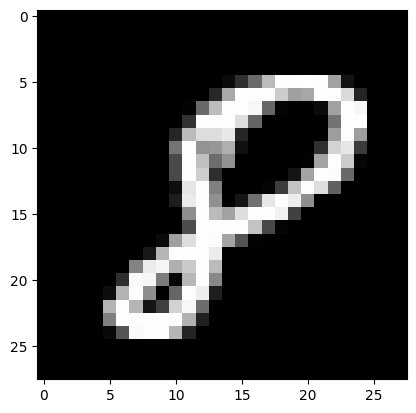

In [33]:
test_prediction(15, W1, b1, W2, b2)

Prediction:  [4]
Label  4


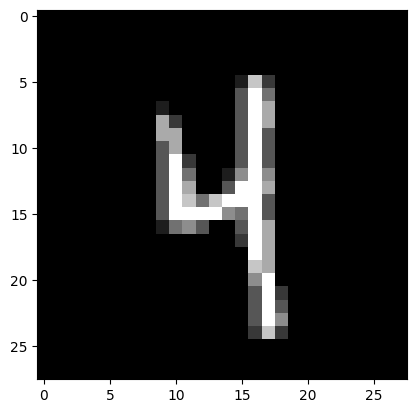

In [34]:
test_prediction(0, W1, b1, W2, b2)

# Here we can see that because the model have 85% accuracy and just one layer there can be errors on the prediction

Prediction:  [5]
Label  3


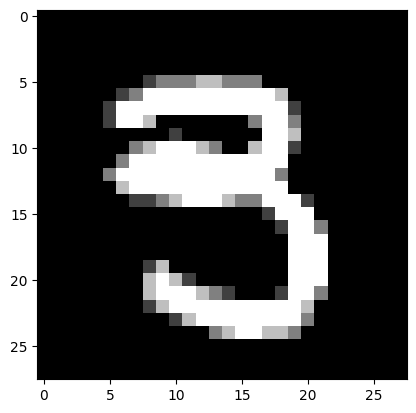

In [35]:
test_prediction(12, W1, b1, W2, b2) 